<a href="https://colab.research.google.com/github/Rohith18744/Traffic-Sign-classification-by-LENET/blob/main/Traffic_Sign_classification_by_LENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
with open('./train.p',mode='rb') as training_data:
    train = pickle.load(training_data)
with open('./valid.p',mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('./test.p',mode='rb') as testing_data:
    test = pickle.load(testing_data)



In [6]:
X_train,y_train=train['features'],train['labels']
X_valid,y_valid=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_valid.shape

(4410, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

5

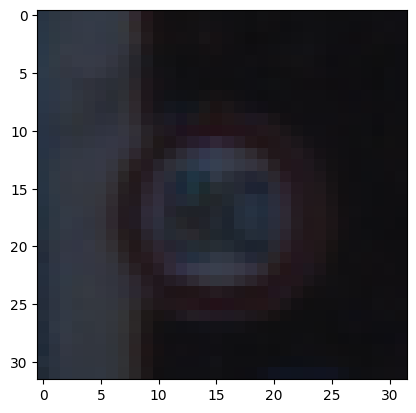

In [10]:
i=13213
plt.imshow(X_train[i])
y_train[i]

In [11]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [12]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)

In [13]:
X_valid_gray

array([[[[12.33333333],
         [11.66666667],
         [11.66666667],
         ...,
         [12.33333333],
         [12.        ],
         [11.66666667]],

        [[12.66666667],
         [11.66666667],
         [12.33333333],
         ...,
         [12.        ],
         [12.        ],
         [11.66666667]],

        [[12.66666667],
         [11.66666667],
         [12.        ],
         ...,
         [12.        ],
         [12.        ],
         [11.66666667]],

        ...,

        [[15.33333333],
         [14.33333333],
         [15.        ],
         ...,
         [12.33333333],
         [13.33333333],
         [13.33333333]],

        [[16.66666667],
         [15.66666667],
         [16.66666667],
         ...,
         [11.33333333],
         [12.33333333],
         [13.33333333]],

        [[17.66666667],
         [16.66666667],
         [17.66666667],
         ...,
         [12.        ],
         [13.        ],
         [14.33333333]]],


       [[[12.66666667],


In [14]:
X_valid_gray.shape

(4410, 32, 32, 1)

In [15]:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_valid_gray_norm=(X_valid_gray-128)/128

In [16]:
X_train_gray_norm

array([[[[-0.5       ],
         [-0.50520833],
         [-0.515625  ],
         ...,
         [ 0.9921875 ],
         [ 0.98177083],
         [ 0.98958333]],

        [[-0.55729167],
         [-0.5546875 ],
         [-0.55729167],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[-0.49479167],
         [-0.5       ],
         [-0.5       ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[-0.52083333],
         [-0.52604167],
         [-0.51822917],
         ...,
         [-0.58854167],
         [-0.5859375 ],
         [-0.58854167]],

        [[-0.48697917],
         [-0.47395833],
         [-0.44791667],
         ...,
         [-0.55989583],
         [-0.55208333],
         [-0.55989583]],

        [[-0.140625  ],
         [-0.109375  ],
         [-0.0859375 ],
         ...,
         [-0.63020833],
         [-0.61197917],
         [-0.59375   ]]],


       [[[-0.80729167],


<Figure size 640x480 with 0 Axes>

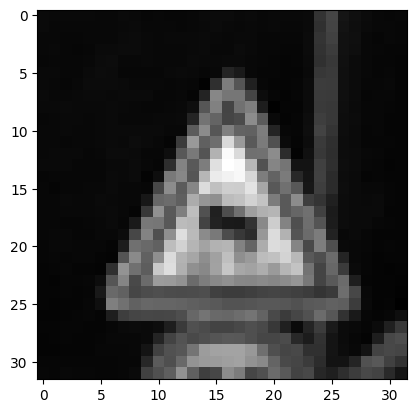

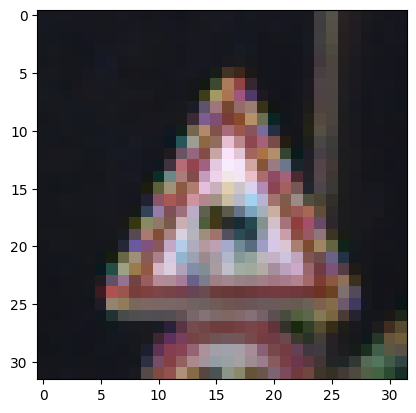

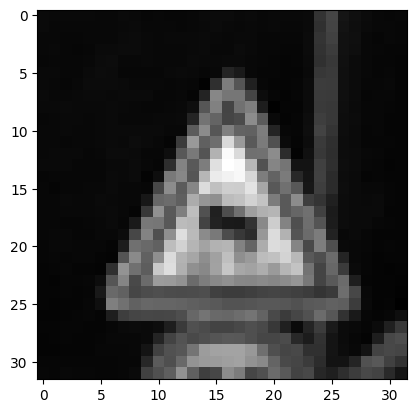

<Figure size 640x480 with 0 Axes>

In [17]:
i=6100
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')
plt.figure()

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120,activation='relu'))
cnn_model.add(Dense(units=84,activation='relu'))
cnn_model.add(Dense(units=43,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [21]:
history=cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(X_valid_gray_norm,y_valid))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.1105 - loss: 3.4442 - val_accuracy: 0.3200 - val_loss: 2.7771
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - accuracy: 0.4474 - loss: 2.0334 - val_accuracy: 0.5395 - val_loss: 1.5700
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - accuracy: 0.6747 - loss: 1.1265 - val_accuracy: 0.6610 - val_loss: 1.1963
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.7657 - loss: 0.8080 - val_accuracy: 0.7005 - val_loss: 1.0146
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - accuracy: 0.8200 - loss: 0.6326 - val_accuracy: 0.7365 - val_loss: 0.9085
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.8573 - loss: 0.5128 - val_accuracy: 0.7701 - val_loss: 0.8228
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.8856 - loss: 0.4255 - val_accuracy: 0.7855 - val_loss: 0.7907
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - accuracy: 0.8981 - loss: 0.3758 - val_accu

In [22]:
score=cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7889 - loss: 1.0102
Test Accuracy: 0.7900237441062927


In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

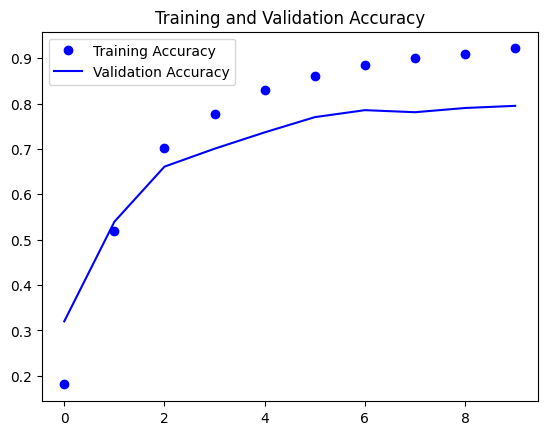

In [26]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

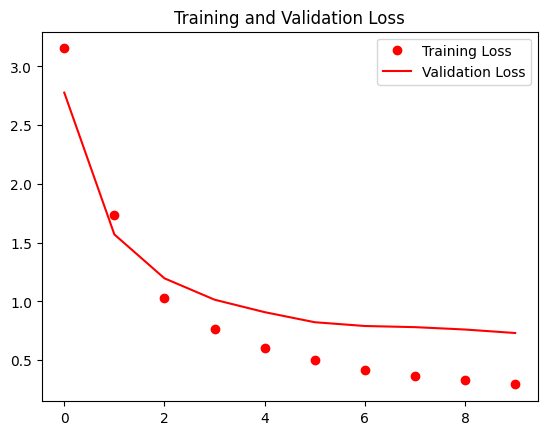

In [28]:

plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [30]:
import numpy as np
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=-1)
y_true=y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Axes: >

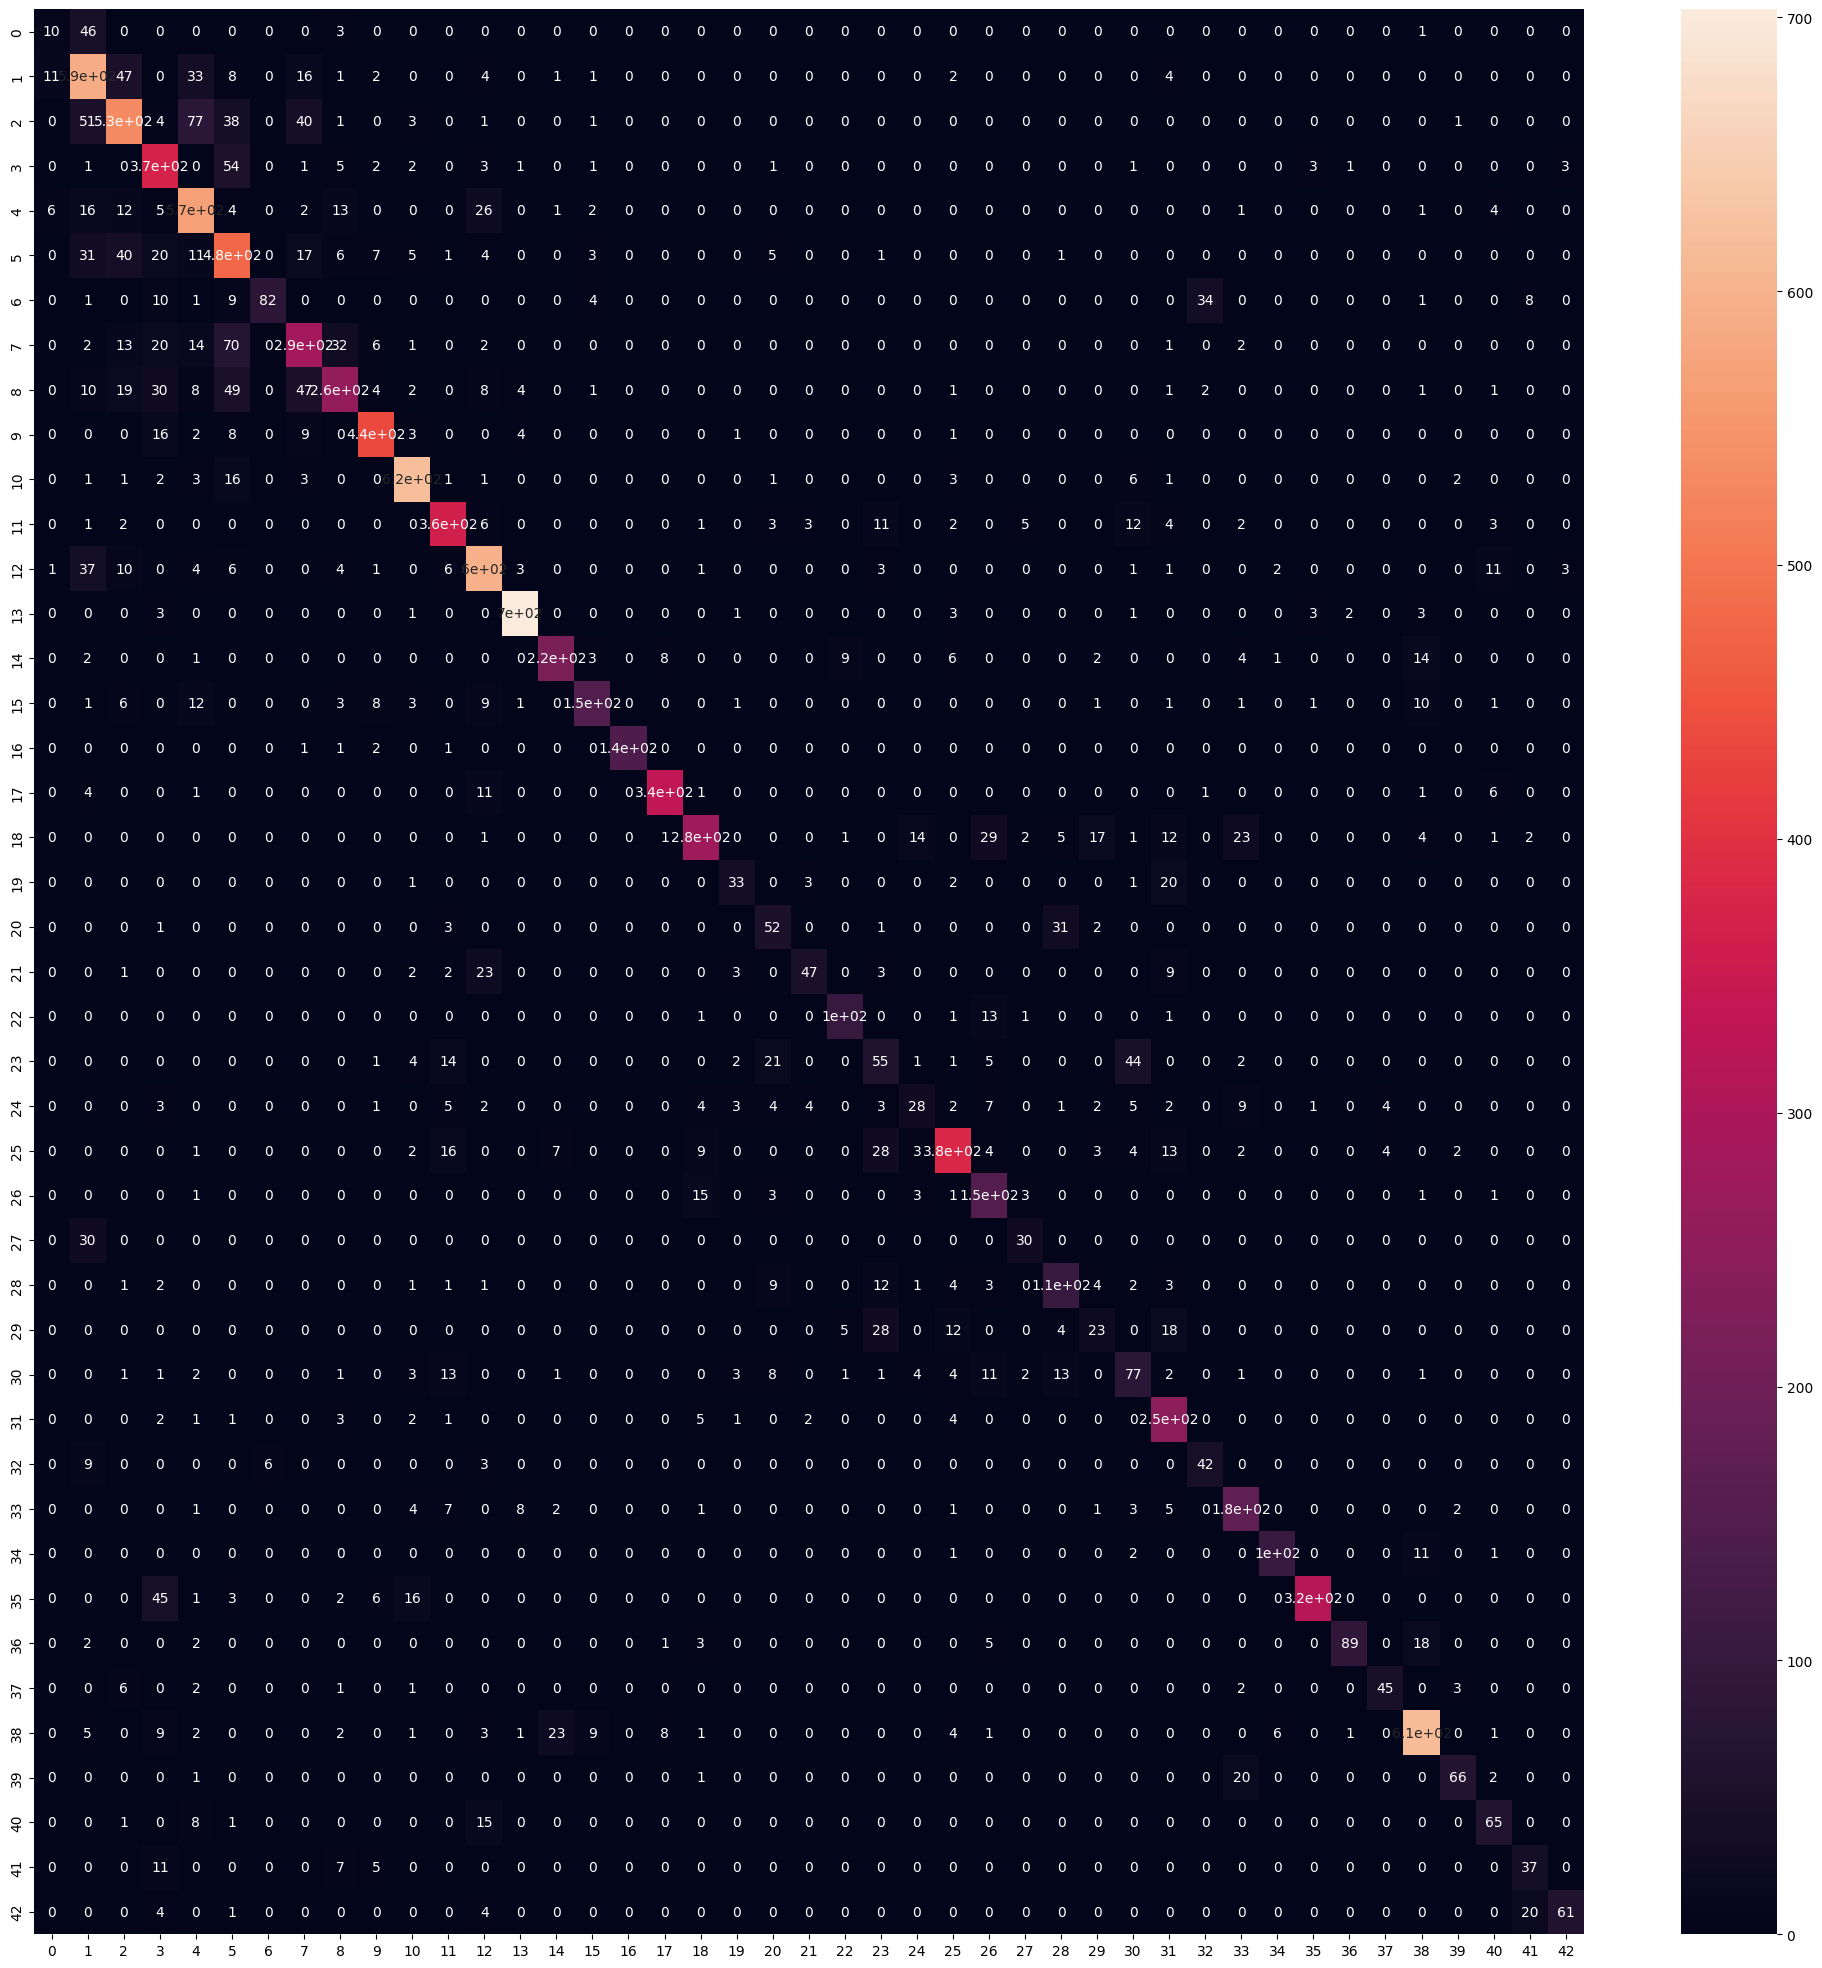

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)


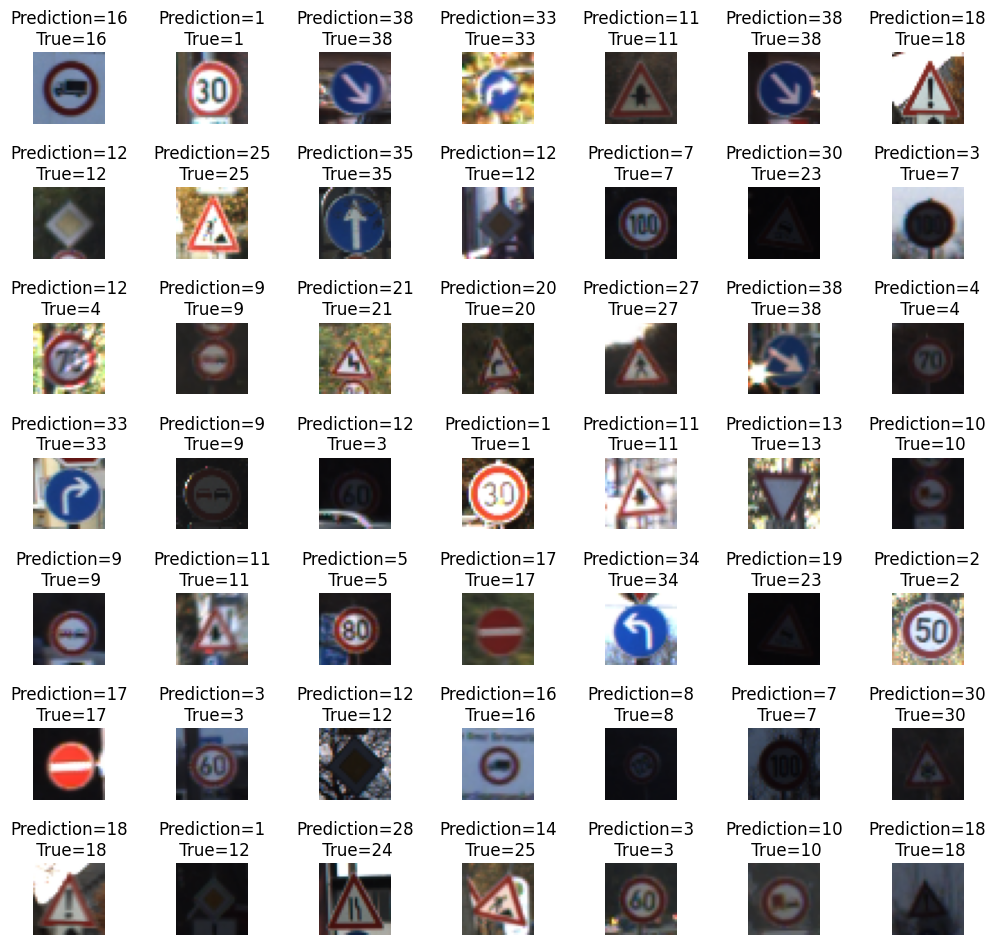

In [37]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)